[0, 0]
[-5.12, 5.0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


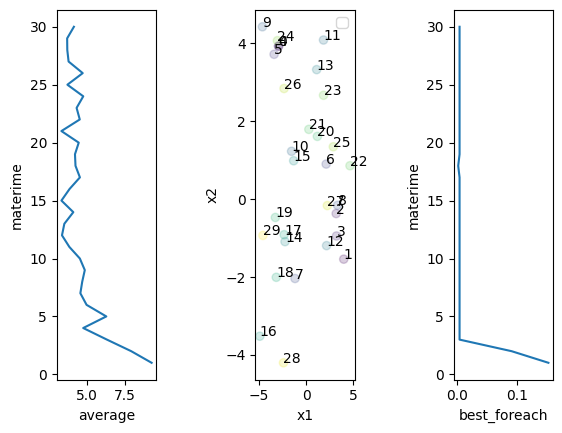

[array([-2.93419922,  3.92451828]), array([ 3.97917868, -1.54219403]), array([ 3.1769429 , -0.37149388]), array([ 3.20981347, -0.94729294]), array([-2.93419922,  3.92451828]), array([-3.40914755,  3.7147482 ]), array([2.11418313, 0.89841246]), array([-1.18964593, -2.03824056]), array([ 3.32556567, -0.16118312]), array([-4.64951803,  4.4209719 ]), array([-1.55650815,  1.22579889]), array([1.83009235, 4.08106025]), array([ 2.15823487, -1.19460061]), array([1.10540918, 3.32208919]), array([-2.24994674, -1.09239594]), array([-1.33432733,  0.98308475]), array([-4.9253858 , -3.51916624]), array([-2.34496686, -0.91435744]), array([-3.17761586, -2.00783957]), array([-3.27516025, -0.47208174]), array([1.17938968, 1.60895683]), array([0.27533591, 1.78837218]), array([4.64157597, 0.85554826]), array([1.83392327, 2.66316073]), array([-3.05624351,  4.06544092]), array([2.87115723, 1.34207313]), array([-2.35239332,  2.83704985]), array([ 2.24046834, -0.16672515]), array([-2.41463809, -4.20112394]), 

ValueError: X must have 2 or fewer dimensions

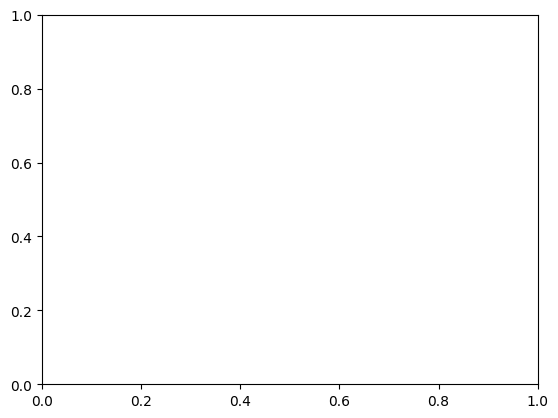

In [2]:
import numpy as np
from random import sample
idx = 0
d = 2
n = 30
cross_p = 0.6
mutate_p = 0.4
popsize = 100
population = []
bound = [0, 0]
#第二种选择方法：设置一个精英保留概率
p_ex = 0.8
print(bound)
bestsol = []
genresbest = []
resavr = []
def func1(a ,b):
    return a**2+b**2
def func2(a ,b):
    return 100*(a**2 + b)**2 + (1 - a)**2
def boundinit(low, up):
    bound[0]=low
    bound[1]=up

def generate_ramdfloat(low, up):
    a = up - low
    b = up - a
    out = (np.random.rand(d) * a + b).tolist()
    out = np.array(out)
    return out
def pop_init(popsize):
    for i in range(popsize):
       pop = generate_ramdfloat(bound[0], bound[1])
       population.append(pop)
def judge(pop):
    for i in range(d):
        if pop[i] < bound[0]:
            pop[i] = bound[0]
        if pop[i] > bound[1]:
            pop[i] = bound[1]
    return pop
def crossover(popsize):
    childpop = []
    for i in range(0, popsize): # 对种群中的每个个体，选择其他个体进行交叉
        candidate = list(range(0, popsize))
        candidate.remove(i)
        cp = np.random.rand()
        if cp <= cross_p:
          j = sample(candidate,1)

          u = np.random.rand()
          b = 0
          if u <= 0.5:
             b = (2*u)**(1/(n+1))
          else:
             b = (1/(2-2*u))**(1/(n+1))
          c1 = (population[i]+population[j[0]])/2 - b*(population[i]-population[j[0]])/2
          c2 = (population[i]+population[j[0]])/2 + b*(population[i]-population[j[0]])/2
          c1 = judge(c1)
          c2 = judge(c2)
          x = np.random.rand()
          if x<mutate_p:
              c1 = mutate(c1)

          childpop.append(c1)
          childpop.append(c2)

    return childpop
def mutate(pop):
       g = np.random.uniform(bound[0], bound[1], 10)
       x = np.random.rand()
       if x<0.5:
           y = np.random.randint(0, high=10, size=1)
           pop[0]=g[y[0]]
       else:
           y = np.random.randint(0, high=10, size=1)
           pop[1] = g[y[0]]

       return pop
def adation(pop):
    if idx == 1:
        return func1(pop[0], pop[1])
    if idx ==2:
        return func2(pop[0], pop[1])
def select(population):
    adapt=[]
    for i in population:
        a = adation(i)
        adapt.append(1-a)
    adapt=np.array(adapt)
    # resavr.append(adapt.sum()/len(adapt))
    q = adapt / adapt.sum()
    q0 = [1 - q[i] for i in range(len(q))]
    q0 = np.array(q0) #/ np.array(p).sum()
    newidx = np.random.choice(np.arange(len(population)), size=popsize, replace=True, p=q0/q0.sum())
    # print(newidx)
    newp=[]
    for i in range(0,popsize):
        newp.append(population[newidx[i]])
    return newp
def select2(population):
    adapt = []
    for i in population:
        a = adation(i)
        adapt.append(a)
    pop_forsort = zip(population, adapt)
    pop_forsort = sorted(pop_forsort, key=lambda s: s[1])
    newp=[]
    pop_sorted = [i[0] for i in pop_forsort]
    newp += pop_sorted[0:int(popsize*p_ex)]
    worseidx = np.random.choice(np.arange(int(popsize*p_ex),len(population)), size=int(popsize-popsize*p_ex))
    for i in range(len(worseidx)):
        newp.append(pop_sorted[worseidx[i]])
    return newp
def countAllandbest(newpop):
    best = np.inf
    bestsoli = []
    resi = 0
    for i in newpop:
        if idx == 1:
            resi = func1(i[0], i[1])
        if idx == 2:
            resi = func2(i[0], i[1])
        if resi < best:
            best = resi
            bestsoli = i
    genresbest.append(best)
    bestsol.append(i)



idx = int(input("请问您要优化第几个函数呢？(输入1或2):"))
a = input("请输入定义域(输入左右边界的数值，用,分隔):").split(",")
boundinit(float(a[0]),float(a[1]))
print(bound)
for i in range(n):
   pop_init(popsize)
   child_pop = crossover(popsize)
   selectpop = population + child_pop
   # newpop = select(selectpop)
   newpop = select2(selectpop)
   # print("这是新的种群", newpop)
   countAllandbest(newpop)
   sum = 0

   for j in range(len(newpop)):
       sum += adation(newpop[j])

   resavr.append(sum/len(newpop))


label = [i for i in range(1,n+1)]
import matplotlib.pyplot as plt
# import mpldatacursor
# plt.use('TkAgg')
fig, axes = plt.subplots(1, 3)

axes[0].plot(resavr, label)
axes[0].set_xlabel('average')
axes[0].set_ylabel('materime')
x = [i[0] for i in bestsol]
y = [i[1] for i in bestsol]
axes[1].scatter(x,y, c=label, cmap='viridis',alpha = 0.2)
for i in range(len(bestsol)):
    axes[1].text(bestsol[i][0],bestsol[i][1],i)
axes[1].legend()
# 添加轴标签
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
axes[1].legend()

axes[2].plot(genresbest, label)
axes[2].set_xlabel('best_foreach')
axes[2].set_ylabel('materime')

fig.subplots_adjust(wspace=1)
plt.show()
print(bestsol)
print(genresbest)
# 显示注释
# mpldatacursor.datacursor(axes[0][0])

In [ ]:
#chatgpt写的代码
import numpy as np
import matplotlib.pyplot as plt

def dejong1(x1, x2):
    return x1**2 + x2**2

def initialize_population(pop_size, x1_bounds, x2_bounds):
    population = []
    for i in range(pop_size):
        x1 = np.random.uniform(x1_bounds[0], x1_bounds[1])
        x2 = np.random.uniform(x2_bounds[0], x2_bounds[1])
        population.append((x1, x2))
    return population

def evaluate_population(population):
    scores = []
    for individual in population:
        score = dejong1(*individual)
        scores.append(score)
    return scores

def select_parents(scores, num_parents):
    parents_indices = np.argsort(scores)[:num_parents]
    parents = [population[i] for i in parents_indices]
    return parents

def crossover(parents, offspring_size):
    offspring = []
    for i in range(offspring_size):
        parent1 = parents[i%len(parents)]
        parent2 = parents[(i+1)%len(parents)]
        x1 = (parent1[0] + parent2[0])/2
        x2 = (parent1[1] + parent2[1])/2
        offspring.append((x1, x2))
    return offspring

def mutate(offspring, mutation_rate, x1_bounds, x2_bounds):
    mutated_offspring = []
    for individual in offspring:
        if np.random.random() < mutation_rate:
            x1 = individual[0] + np.random.normal(0, (x1_bounds[1]-x1_bounds[0])/10)
            x2 = individual[1] + np.random.normal(0, (x2_bounds[1]-x2_bounds[0])/10)
            x1 = np.clip(x1, x1_bounds[0], x1_bounds[1])
            x2 = np.clip(x2, x2_bounds[0], x2_bounds[1])
            mutated_offspring.append((x1, x2))
        else:
            mutated_offspring.append(individual)
    return mutated_offspring

# GA parameters
pop_size = 200
num_generations = 100
num_parents = 10
mutation_rate = 0.1
x1_bounds = [-5.12, 5.12]
x2_bounds = [-5.12, 5.12]

# Initialize population
population = initialize_population(pop_size, x1_bounds, x2_bounds)
best_scores = []
best_solution = None
best_solution_score = np.inf

# Run GA
for i in range(num_generations):
    # Evaluate population
    scores = evaluate_population(population)
    best_score = min(scores)
    best_scores.append(best_score)
    if best_score < best_solution_score:
        best_solution = population[np.argmin(scores)]
        best_solution_score = best_score
    # Select parents
    parents = select_parents(scores, num_parents)
    # Crossover
    offspring = crossover(parents, pop_size-num_parents)
    # Mutate
    offspring = mutate(offspring, mutation_rate, x1_bounds, x2_bounds)
    # Create new population
    population = parents + offspring

# Plot convergence
plt.plot(best_scores)
plt.title("Convergence")
plt.xlabel("Generation")
plt.ylabel("Best score")
plt.show()

print("Best solution found:", best_solution)
print("Best score:", best_solution_score)
